In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = r"C:\Users\ksund\Music\denrite\DA assignment\DA assignment\ecommerce_data.csv"

In [3]:
# Attempt to load the file again with a different encoding to avoid UnicodeDecodeError
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
data.head()

,customer_id,customer_first_name,customer_last_name,category_name,product_name,customer_segment,customer_city,customer_state,customer_country,customer_region,...,order_date,order_id,ship_date,shipping_type,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
0,C_ID_45866,Mary,Fuller,Office Supplies,Xerox 1913,Corporate,New Rochelle,New York,United States,East,...,11-05-2022,O_ID_3001072,11-07-2022,Second Class,2,2,35.0,500.0,5,223.199997
1,C_ID_44932,Alan,Edelman,Office Supplies,#6 3/4 Gummed Flap White Envelopes,Corporate,Houston,Texas,United States,Central,...,20-06-2022,O_ID_3009170,23-06-2022,Second Class,2,3,85.0,500.0,5,199.199997
2,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,Kentucky,United States,South,...,25-06-2022,O_ID_3047567,30-06-2022,Standard Class,4,5,75.0,44.0,5,195.500000
3,C_ID_33157,Raymond,Eason,Office Supplies,GBC VeloBinder Manual Binding System,Corporate,Chicago,Illinois,United States,Central,...,10-06-2022,O_ID_3060575,10-10-2022,Second Class,2,4,60.0,254.0,1,220.000000
4,C_ID_58303,Mary,Gonzalez,Furniture,Eldon Pizzaz Desk Accessories,Home Office,Philadelphia,Pennsylvania,United States,East,...,02-05-2022,O_ID_3064311,08-01-2022,First Class,1,2,125.0,500.0,1,97.500000


In [4]:
data.shape

(113270, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  113270 non-null  object 
 1   customer_first_name          113270 non-null  object 
 2   customer_last_name           113270 non-null  object 
 3   category_name                113270 non-null  object 
 4   product_name                 113270 non-null  object 
 5   customer_segment             113270 non-null  object 
 6   customer_city                113270 non-null  object 
 7   customer_state               113270 non-null  object 
 8   customer_country             113270 non-null  object 
 9   customer_region              113270 non-null  object 
 10  delivery_status              113270 non-null  object 
 11  order_date                   113270 non-null  object 
 12  order_id                     113270 non-null  object 
 13 

In [6]:
# Preprocessing: Convert order_date and ship_date to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], format='%d-%m-%Y')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%d-%m-%Y')

# Calculate the month and year for monthly sales analysis
data['order_month'] = data['order_date'].dt.to_period('M')

# Calculate shipment delays
data['shipment_delay'] = data['days_for_shipment_real'] - data['days_for_shipment_scheduled']

# Monthly Sales: Group by month and calculate total sales
monthly_sales = data.groupby('order_month')['sales_per_order'].sum()

# Top-Selling Products: Group by product and calculate total sales
top_selling_products = data.groupby('product_name')['sales_per_order'].sum().sort_values(ascending=False)

# Customer Segmentation: Count orders per customer segment
customer_segment_orders = data['customer_segment'].value_counts()

# Delivery Performance: Count orders by delivery status
delivery_performance = data['delivery_status'].value_counts()

# Shipment Delays: Average delay in shipment
average_delay = data['shipment_delay'].mean()

# Profit Analysis: Group by product and calculate total profit
product_profit = data.groupby('product_name')['profit_per_order'].sum().sort_values(ascending=False)

# Compile insights into a summary
insights = {
    "Monthly Sales (Total)": monthly_sales,
    "Top-Selling Products": top_selling_products.head(5),
    "Customer Segmentation": customer_segment_orders,
    "Delivery Performance": delivery_performance,
    "Average Shipment Delay (Days)": average_delay,
    "Most Profitable Products": product_profit.head(5)
}

insights


{'Monthly Sales (Total)': order_month
 2021-01    8.895952e+05
 2021-02    8.758424e+05
 2021-03    1.030156e+06
 2021-04    9.516577e+05
 2021-05    9.692721e+05
 2021-06    9.861126e+05
 2021-07    1.015741e+06
 2021-08    9.886237e+05
 2021-09    9.569847e+05
 2021-10    9.979590e+05
 2021-11    9.786362e+05
 2021-12    9.894411e+05
 2022-01    1.021701e+06
 2022-02    9.188257e+05
 2022-03    9.687355e+05
 2022-04    9.196209e+05
 2022-05    9.921853e+05
 2022-06    8.875453e+05
 2022-07    1.035459e+06
 2022-08    9.861540e+05
 2022-09    9.844785e+05
 2022-10    1.112452e+06
 2022-11    9.614940e+05
 2022-12    7.449898e+05
 Freq: M, Name: sales_per_order, dtype: float64,
 'Top-Selling Products': product_name
 Staples                       113516.286068
 Staple envelope               112116.902191
 Easy-staple paper              99214.065885
 KI Adjustable-Height Table     45882.998873
 Avery Non-Stick Binders        45687.198824
 Name: sales_per_order, dtype: float64,
 'Customer

## Customer Retention Analysis: Identify how many customers are repeat buyers

In [7]:
# Count the number of orders per customer
customer_order_counts = data['customer_id'].value_counts()

# Count how many customers have placed more than one order (i.e., repeat customers)
repeat_customers = customer_order_counts[customer_order_counts > 1].count()

# Total number of unique customers
total_customers = customer_order_counts.count()

# Calculate the customer retention rate (percentage of repeat customers)
retention_rate = repeat_customers / total_customers

print(f"Total Customers: {total_customers}")
print(f"Repeat Customers: {repeat_customers}")
print(f"Customer Retention Rate: {retention_rate:.2%}")


Total Customers: 42047
Repeat Customers: 28617
Customer Retention Rate: 68.06%


## Order Trends: Analyze the distribution of orders by different categories and regions.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Order Distribution by Category:
category_name
Office Supplies    68111
Furniture          24443
Technology         20716
Name: order_id, dtype: int64


C:\Users\ksund\AppData\Local\Temp\ipykernel_17656\3768247843.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')


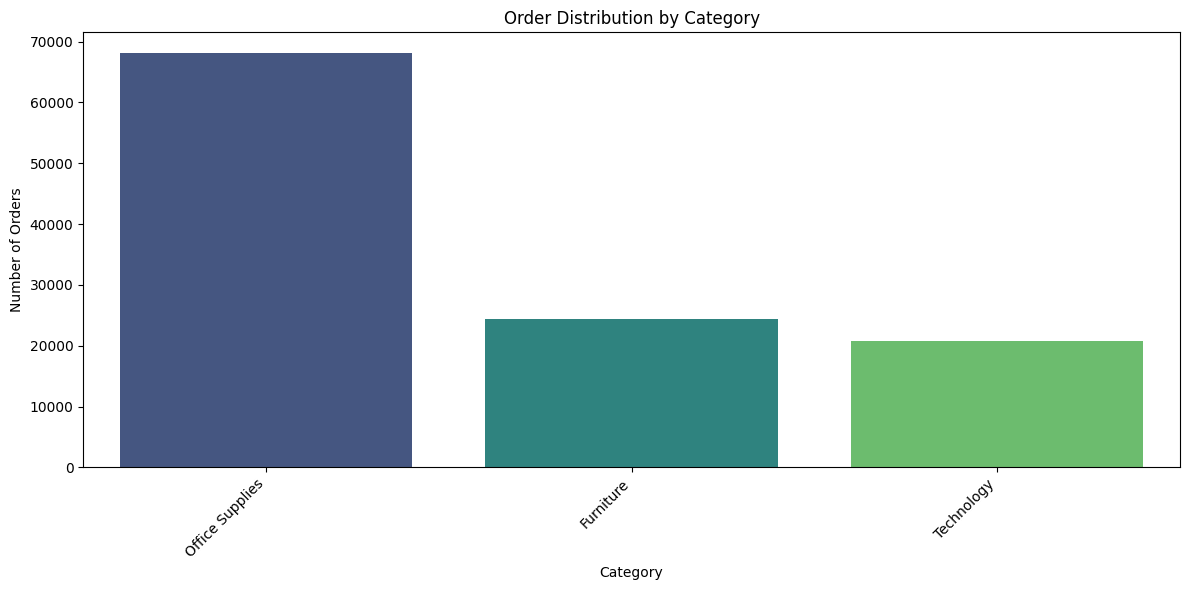

Order Distribution by Region:
customer_region
West       36295
East       32260
Central    26314
South      18401
Name: order_id, dtype: int64


C:\Users\ksund\AppData\Local\Temp\ipykernel_17656\3768247843.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='plasma')


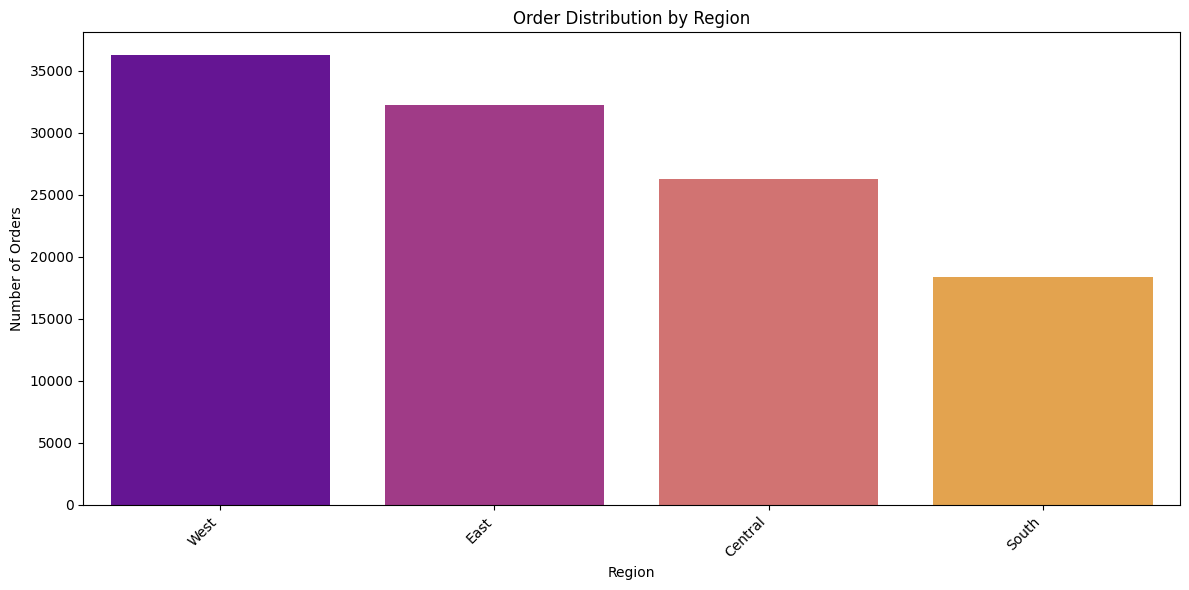

In [10]:

# Convert order_date to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], format='%d-%m-%Y')

# Analyze distribution by category
category_distribution = data.groupby('category_name')['order_id'].count().sort_values(ascending=False)
print("Order Distribution by Category:")
print(category_distribution)

# Plot distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Order Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Analyze distribution by region
region_distribution = data.groupby('customer_region')['order_id'].count().sort_values(ascending=False)
print("Order Distribution by Region:")
print(region_distribution)

# Plot distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Order Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


## Impact of Discounts on Sales: Assess how discounts correlate with sales and profit.

Correlation between Discounts and Sales: 0.61
Correlation between Discounts and Profit: 0.09


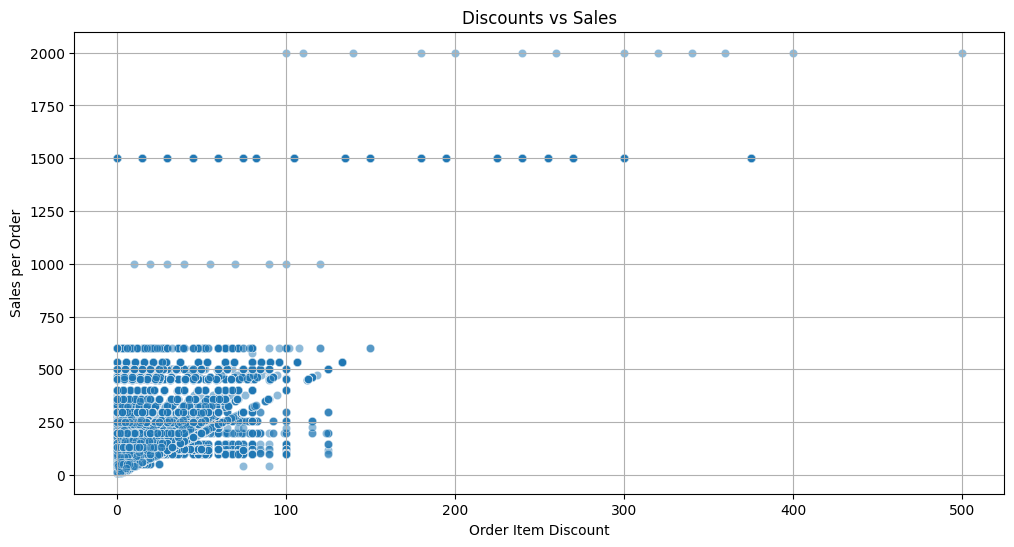

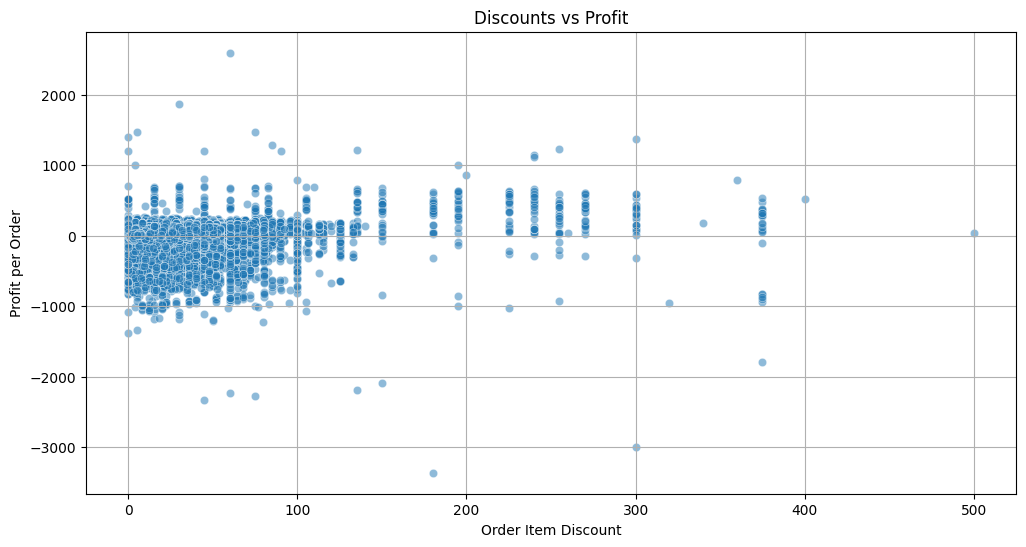

In [11]:


# Convert columns to appropriate types if necessary
data['order_item_discount'] = data['order_item_discount'].astype(float)
data['sales_per_order'] = data['sales_per_order'].astype(float)
data['profit_per_order'] = data['profit_per_order'].astype(float)

# Calculate correlations
correlation_sales_discount = data[['order_item_discount', 'sales_per_order']].corr().iloc[0, 1]
correlation_profit_discount = data[['order_item_discount', 'profit_per_order']].corr().iloc[0, 1]

print(f"Correlation between Discounts and Sales: {correlation_sales_discount:.2f}")
print(f"Correlation between Discounts and Profit: {correlation_profit_discount:.2f}")

# Visualize relationships

# Scatter plot for Discounts vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='order_item_discount', y='sales_per_order', data=data, alpha=0.5)
plt.title('Discounts vs Sales')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales per Order')
plt.grid(True)
plt.show()

# Scatter plot for Discounts vs Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='order_item_discount', y='profit_per_order', data=data, alpha=0.5)
plt.title('Discounts vs Profit')
plt.xlabel('Order Item Discount')
plt.ylabel('Profit per Order')
plt.grid(True)
plt.show()


## Profitability by Customer Segment: Understand which customer segments are driving the most profit.

Total Profit by Customer Segment:
customer_segment
Consumer       1.372265e+06
Corporate      7.897194e+05
Home Office    4.510842e+05
Name: profit_per_order, dtype: float64


C:\Users\ksund\AppData\Local\Temp\ipykernel_17656\2786467990.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_segment.index, y=profit_by_segment.values, palette='coolwarm')


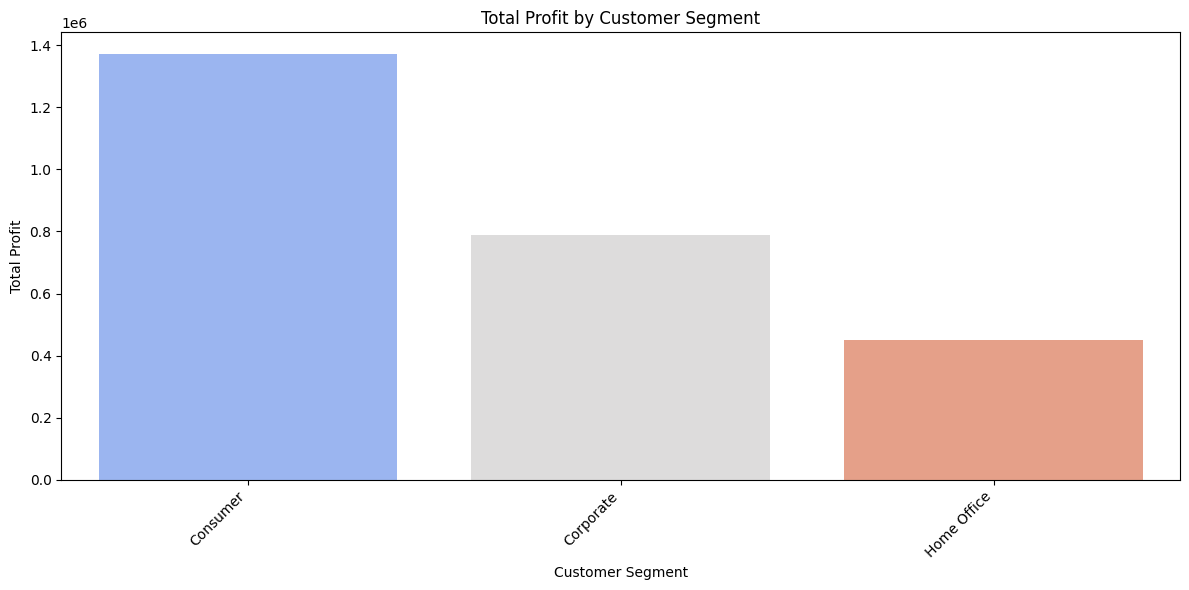

In [12]:


# Convert profit column to float if necessary
data['profit_per_order'] = data['profit_per_order'].astype(float)

# Calculate total profit by customer segment
profit_by_segment = data.groupby('customer_segment')['profit_per_order'].sum().sort_values(ascending=False)
print("Total Profit by Customer Segment:")
print(profit_by_segment)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_segment.index, y=profit_by_segment.values, palette='coolwarm')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Shipping Type Performance: Evaluate which shipping types are most effective in delivering on time and their impact on sales.

Shipping Type Performance:
                On-Time Delivery Rate   Total Sales
shipping_type                                      
First Class                  0.000000  3.595518e+06
Same Day                     0.492079  1.224602e+06
Second Class                 0.195892  4.496223e+06
Standard Class               0.192660  1.384732e+07


C:\Users\ksund\AppData\Local\Temp\ipykernel_17656\745741058.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_performance.index, y=shipping_performance['On-Time Delivery Rate'], palette='viridis')
C:\Users\ksund\AppData\Local\Temp\ipykernel_17656\745741058.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_performance.index, y=shipping_performance['Total Sales'], palette='plasma')


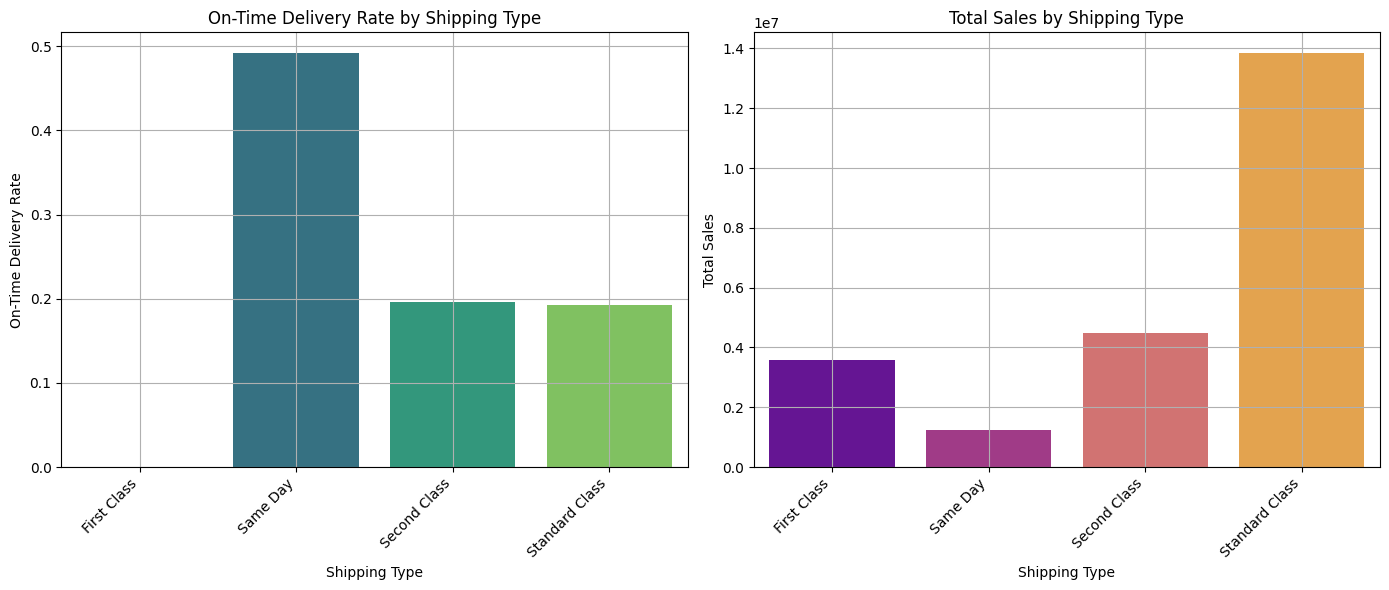

In [13]:


# Convert columns to appropriate types if necessary
data['shipping_type'] = data['shipping_type'].astype(str)
data['delivery_status'] = data['delivery_status'].astype(str)
data['sales_per_order'] = data['sales_per_order'].astype(float)

# Calculate on-time delivery rate for each shipping type
on_time_deliveries = data[data['delivery_status'] == 'Shipping on time']
total_orders_per_shipping_type = data.groupby('shipping_type')['order_id'].count()
on_time_orders_per_shipping_type = on_time_deliveries.groupby('shipping_type')['order_id'].count()
on_time_delivery_rate = (on_time_orders_per_shipping_type / total_orders_per_shipping_type).fillna(0)

# Calculate total sales by shipping type
total_sales_per_shipping_type = data.groupby('shipping_type')['sales_per_order'].sum()

# Combine results into a single DataFrame
shipping_performance = pd.DataFrame({
    'On-Time Delivery Rate': on_time_delivery_rate,
    'Total Sales': total_sales_per_shipping_type
}).fillna(0)

print("Shipping Type Performance:")
print(shipping_performance)

# Plot On-Time Delivery Rate
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=shipping_performance.index, y=shipping_performance['On-Time Delivery Rate'], palette='viridis')
plt.title('On-Time Delivery Rate by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('On-Time Delivery Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Plot Total Sales
plt.subplot(1, 2, 2)
sns.barplot(x=shipping_performance.index, y=shipping_performance['Total Sales'], palette='plasma')
plt.title('Total Sales by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\ksund\Music\denrite\DA assignment\DA assignment\ecommerce_data.csv" # Update with your file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert dates to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%m-%Y')

# Extract year, month, and quarter for time-based analysis
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_quarter'] = df['order_date'].dt.to_period('Q')

# Calculate profit margin for each order
df['profit_margin'] = (df['profit_per_order'] / df['sales_per_order']) * 100

# Cohort Analysis Preparation
df['cohort_month'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')
df['order_month_period'] = df['order_date'].dt.to_period('M')

# Calculate the time offset in months for each cohort
df['cohort_index'] = (df['order_month_period'] - df['cohort_month']).apply(lambda x: x.n)

# Group the data to get cohort analysis
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().unstack(0)

# Calculate retention rates
cohort_size = cohort_data.iloc[0]
retention = cohort_data.divide(cohort_size, axis=1)

# Calculate repeat purchase rate by customer segment
repeat_purchases = df[df.duplicated(['customer_id'], keep=False)].groupby('customer_segment').size() / df['customer_id'].nunique()

# Calculate Customer Lifetime Value (CLV)
df['clv'] = df.groupby('customer_id')['profit_per_order'].transform('sum')

# Calculate the average shipping time (actual vs scheduled)
df['shipping_delay'] = df['days_for_shipment_real'] - df['days_for_shipment_scheduled']

# Save the processed data for Power BI
df.to_csv('processed_ecommerce_data.csv', index=False)  # Update with your desired file path
retention.to_csv('cohort_retention_data.csv', index=True)


In [2]:
# Attempt to load the file again with a different encoding to avoid UnicodeDecodeError
data = pd.read_csv(file_path, encoding='ISO-8859-1')
# Convert relevant columns to appropriate types
data['order_date'] = pd.to_datetime(data['order_date'], format='%d-%m-%Y')
data['sales_per_order'] = data['sales_per_order'].astype(float)
data['profit_per_order'] = data['profit_per_order'].astype(float)
data['order_id'] = data['order_id'].astype(str)
data['customer_city'] = data['customer_city'].astype(str)
data['customer_state'] = data['customer_state'].astype(str)
data['customer_country'] = data['customer_country'].astype(str)
data['customer_segment'] = data['customer_segment'].astype(str)
data['customer_id'] = data['customer_id'].astype(str)
# Convert relevant columns to appropriate types
data['order_item_discount'] = data['order_item_discount'].astype(float)
# Add latitude and longitude columns based on the geocoding function
#data[['latitude', 'longitude']] = data.apply(lambda row: pd.Series(geocode_city(row['customer_city'], row['customer_state'], row['customer_country'])), axis=1)

# Convert relevant columns to appropriate types
data['order_date'] = pd.to_datetime(data['order_date'], format='%d-%m-%Y')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%d-%m-%Y')
data['days_for_shipment_scheduled'] = data['days_for_shipment_scheduled'].astype(int)
data['days_for_shipment_real'] = data['days_for_shipment_real'].astype(int)
data['shipping_type'] = data['shipping_type'].astype(str)

# Calculate shipment delays
data['shipment_delay'] = data['days_for_shipment_real'] - data['days_for_shipment_scheduled']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   customer_id                  113270 non-null  object        
 1   customer_first_name          113270 non-null  object        
 2   customer_last_name           113270 non-null  object        
 3   category_name                113270 non-null  object        
 4   product_name                 113270 non-null  object        
 5   customer_segment             113270 non-null  object        
 6   customer_city                113270 non-null  object        
 7   customer_state               113270 non-null  object        
 8   customer_country             113270 non-null  object        
 9   customer_region              113270 non-null  object        
 10  delivery_status              113270 non-null  object        
 11  order_date                